In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load

In [3]:
# Load data
data_path = "/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/ctfeatures/new_train_data_128.csv"
data = pd.read_csv(data_path).sample(frac=1)

# Train test split
X = data.iloc[:, 0:43]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

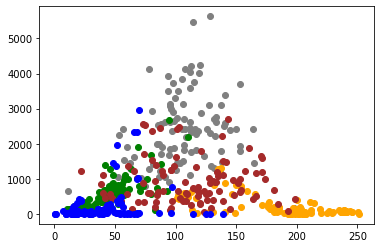

In [4]:
# Data Visualization
feature1 = 'red mean'
feature2 = 'red var'

# City
city = data.loc[data['class'] == 'city'].sample(100)
plt.scatter(city[feature1], city[feature2], c='gray')

# Desert
desert = data.loc[data['class'] == 'desert'].sample(100)
plt.scatter(desert[feature1], desert[feature2], c='orange')

# Forest
forest = data.loc[data['class'] == 'forest'].sample(100)
plt.scatter(forest[feature1], forest[feature2], c='green')

# Mountain
mountain = data.loc[data['class'] == 'mountain'].sample(100)
plt.scatter(mountain[feature1], mountain[feature2], c='brown')

# Ocean
ocean = data.loc[data['class'] == 'ocean'].sample(100)
plt.scatter(ocean[feature1], ocean[feature2], c='blue')

plt.show()

In [5]:
# Train
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)
#dump(clf, 'models/svm.joblib') 
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.976 (+/- 0.00)


In [6]:
# Test
y_pred = clf.predict(X_test)

# Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4869    2   32   57   18]
 [  15 3543    0   17    0]
 [ 103    1 3886   36    3]
 [ 114   15   15 3700    5]
 [  38    1    5    5 4681]]
              precision    recall  f1-score   support

        city       0.95      0.98      0.96      4978
      desert       0.99      0.99      0.99      3575
      forest       0.99      0.96      0.98      4029
    mountain       0.97      0.96      0.97      3849
       ocean       0.99      0.99      0.99      4730

    accuracy                           0.98     21161
   macro avg       0.98      0.98      0.98     21161
weighted avg       0.98      0.98      0.98     21161



In [7]:
!pip install mahotas

''' ctfeatures computes the color and texture features of an image or set of images '''

# Import libraries
import os
from numpy import mean, var, reshape, uint8, empty, array, append
from pandas import DataFrame
from scipy.stats import skew, kurtosis
from skimage.color import rgb2hsv, rgb2gray
from sklearn.decomposition import PCA
from mahotas.features import haralick


###################################################################################################################################

def get_color_features(image):

    ''' Get color features 
        f1: red mean
        f2: red variance
        f3: red skewness
        f4: red kurtosis
        f5: green mean
        f6: green variance
        f7: green skewness
        f8: green kurtosis
        f9: blue mean
        f10: blue variance
        f11: blue skewness
        f12: blue kurtosis
        f13: hue mean
        f14: hue variance
        f15: hue skewness
        f16: hue kurtosis
        f17: saturation mean
        f18: saturation variance
        f19: saturation skewness
        f20: saturation kurtosis
        f21: value mean
        f22: value variance
        f23: value skewness
        f24: value kurtosis
        f25: first component 1
        f26: first component 2
        f27: first component 3
        f28: second component 1
        f29: second component 2
        f30: second component 3 '''

    # RGB channels
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    # HSV channels
    hsv_image = rgb2hsv(image)
    hue_channel = hsv_image[:, :, 0]
    saturation_channel = hsv_image[:, :, 1]
    value_channel = hsv_image[:, :, 2]
    
    # Red channel statistics
    f1 = mean(red_channel)
    f2 = var(red_channel)
    f3 = skew(red_channel, axis=None)
    f4 = kurtosis(red_channel, axis=None)
    
    # Green channel statistics
    f5 = mean(green_channel)
    f6 = var(green_channel)
    f7 = skew(green_channel, axis=None)
    f8 = kurtosis(green_channel, axis=None)
    
    # Blue channel statistics
    f9 = mean(blue_channel)
    f10 = var(blue_channel)
    f11 = skew(blue_channel, axis=None)
    f12 = kurtosis(blue_channel, axis=None)
    
    # Hue channel statistics
    f13 = mean(hue_channel)
    f14 = var(hue_channel)
    f15 = skew(hue_channel, axis=None)
    f16 = kurtosis(hue_channel, axis=None)
    
    # Saturation channel statistics
    f17 = mean(saturation_channel)
    f18 = var(saturation_channel)
    f19 = skew(saturation_channel, axis=None)
    f20 = kurtosis(saturation_channel, axis=None)
    
    # Value channel statistics
    f21 = mean(value_channel)
    f22 = var(value_channel)
    f23 = skew(value_channel, axis=None)
    f24 = kurtosis(value_channel, axis=None)
    
    # PCA
    new_shape = (image.shape[0] * image.shape[1], image.shape[2])
    data = reshape(image, new_shape)
    pca = PCA(n_components=image.shape[2])
    pca.fit(data)
    components = pca.components_
    (f25, f26, f27) = components[0, :]
    (f28, f29, f30) = components[1, :]
    
    # Feature vector
    color_features = array([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, 
                      f16, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27, f28, f29, f30])

    return color_features

###################################################################################################################################

def get_texture_features(image):
    
    # Transform RGB image to grayscale
    
    gray_image = uint8(rgb2gray(image) * 255)
    haralick_features = haralick(gray_image)
    texture_features = haralick_features.mean(axis=0)
    
    return texture_features

###################################################################################################################################

def get_image_data(image, classification, dimensions):
    
    # Numero de pixeles de la imagen y de las subimagenes
    image_height = image.shape[0]
    image_width = image.shape[1]
    c = image.shape[2]
    (subimage_height, subimage_width) = dimensions
    
    # Cortar los pixeles que sobran de cada dimension para que la imagen sea divisible
    height_remainder = image_height % subimage_height
    width_remainder = image_width % subimage_width
    image = image[height_remainder:, width_remainder:, :]
    
    # Nuevas dimensiones
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Crear un array de tamano (n_subimage, subimage_height, subimage_width)
    num_subimages = int(image_height / subimage_height * image_width / subimage_width)
    num_features = 43
    X = empty((num_subimages, num_features))
    y = [''] * num_subimages
    index = 0
    for i in range(int(image_height / subimage_height)):
        for j in range(int(image_width / subimage_width)):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            subimage = image[x_start:x_end, y_start:y_end, :]
            
            color_features = get_color_features(subimage)
            texture_features = get_texture_features(subimage)
            
            X[index, 0:30] = color_features
            X[index, 30:43] = texture_features
            y[index] = classification
            
            index += 1
            
    # Create Data Frame to store the color and texture features of the image
    columns = ['red mean', 'red var', 'red skew', 'red kurt', 'green mean', 'green var', 'green skew', 'green kurt', 
               'blue mean', 'blue var', 'blue skew', 'blue kurt', 'hue mean', 'hue var', 'hue skew', 'hue kurt',
               'sat mean', 'sat var', 'sat skew', 'sat kurt', 'val mean', 'val var', 'val skew', 'val kurt',
               'pc1-1', 'pc1-2', 'pc1-3', 'pc2-1', 'pc2-2', 'pc2-3', 'asm', 'contrast',
               'correlation', 'variance', 'inv diff moment', 'sum average', 'sum variance', 'sum entropy', 'entropy', 'diff var',
               'diff entropy', 'imc 1', 'imc 2']
    df = DataFrame(X, columns=columns)
    df['class'] = y
    
    return df

###################################################################################################################################

def count_subimages(path):
    n = 0
    image_classes = os.listdir(path)
    if '.DS_Store' in image_classes:
        image_classes.remove('.DS_Store')
    for image_class in image_classes:
        class_path = path + image_class + '/'
        images = os.listdir(class_path)
        if '.DS_Store' in images:
            images.remove('.DS_Store')
        n += len(images)
    return n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 30.3 MB/s 


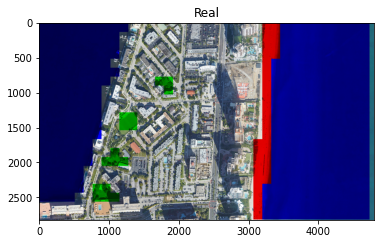

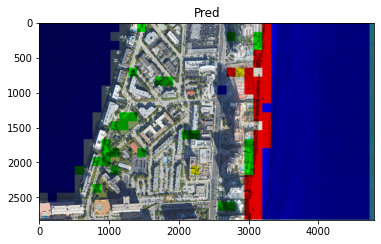

[[345  19   2  17   1]
 [  8   8   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0  22   9]
 [ 15   1   0   0 367]]
              precision    recall  f1-score   support

         1.0       0.94      0.90      0.92       384
         2.0       0.29      0.50      0.36        16
         3.0       0.00      0.00      0.00         0
         4.0       0.56      0.71      0.63        31
         5.0       0.97      0.96      0.97       383

    accuracy                           0.91       814
   macro avg       0.55      0.61      0.58       814
weighted avg       0.93      0.91      0.92       814



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True

In [13]:
# libraries
import numpy as np
# import ctfeatures as ctf
from PIL import Image
from joblib import dump, load

# Load test image
image_name = 'test4'
image_path = '/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/test_images/' + image_name + '.jpg'
map_path = '/gdrive/MyDrive/Journals/Classification of satellite images based on their type of terrain/maps/' + image_name + '.tiff'

image = np.array(Image.open(image_path))
data = get_image_data(image, '', (128, 128))
X = data.iloc[:, 0:43]
X = scaler.transform(X)

# clf = load('models/svm.joblib') 
y_pred = clf.predict(X)

real_copy = np.array(Image.open(image_path))
pred_copy = np.array(Image.open(image_path))
map = np.array(Image.open(map_path))
y_true = map.flatten()

image_height = image.shape[0]
image_width = image.shape[1]

subimage_height = 128 
subimage_width = 128

pred_map = np.zeros(map.shape)

index = 0
classes = {
    "city": 1,
    "forest": 2,
    "mountain": 3,
    "desert": 4,
    "water": 5,
}
for i in range(int(np.floor(image_height / subimage_height))):
        for j in range(int(np.floor(image_width / subimage_width))):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            
            if y_true[index] == classes["city"]:
                pass
            elif y_true[index] == classes["desert"]:
                real_copy[x_start:x_end, y_start:y_end, 1] = 0
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            elif y_true[index] == classes["forest"]:
                real_copy[x_start:x_end, y_start:y_end, 0] = 0
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            elif y_true[index] == classes["mountain"]:
                real_copy[x_start:x_end, y_start:y_end, 2] = 0
            else:
                real_copy[x_start:x_end, y_start:y_end, 0] = 0
                real_copy[x_start:x_end, y_start:y_end, 1] = 0
            
            index += 1
            
img = plt.imshow(real_copy)
plt.title("Real")
plt.show()

index = 0
for i in range(int(np.floor(image_height / subimage_height))):
        for j in range(int(np.floor(image_width / subimage_width))):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            
            if y_pred[index] == 'city':
                pred_map[i,j] = 1
            elif y_pred[index] == 'desert':
                pred_copy[x_start:x_end, y_start:y_end, 1] = 0
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 4
            elif y_pred[index] == 'forest':
                pred_copy[x_start:x_end, y_start:y_end, 0] = 0
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 2
            elif y_pred[index] == 'mountain':
                pred_copy[x_start:x_end, y_start:y_end, 2] = 0
                pred_map[i,j] = 3
            else:
                pred_copy[x_start:x_end, y_start:y_end, 0] = 0
                pred_copy[x_start:x_end, y_start:y_end, 1] = 0
                pred_map[i,j] = 5
            
            index += 1
            
img = plt.imshow(pred_copy)
plt.title("Pred")
plt.show()
# plt.savefig(image_name + '.jpg', dpi=400)

y_pred = pred_map.flatten()
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true,y_pred))

# Save images
import cv2
bgr = cv2.cvtColor(pred_copy, cv2.COLOR_RGB2BGR)
cv2.imwrite(f"/tmp/rf_{image_name}.png", bgr)